<span style='color:Blue ;
             font-size:30px;'>
    Computational Intelligence assignment №1.  </span><br>
<span style='color:Red ;
             font-size:15px;'>
    Student : Amir Zakirov.  </span><br>

## Task 2

In [1]:
import numpy as np
import numpy.linalg as LA
from random import uniform
import matplotlib.pyplot as plt
from scipy.linalg import null_space
%matplotlib inline
N=100
def_array = np.linspace(-0.5,0.5,N)

#### Task 2.1

In [2]:
"M*x = (0)"
M = np.zeros((3,3),dtype = int)
M[0,0] = 3
M[0,1] = 1
M[0,2] = 1
M[1,0] = 6
M[1,1] = 2
M[1,2] = 2
M[2,0] = -9
M[2,1] = -3
M[2,2] = -3

#null space of matrix m:
n = null_space(M)
print("Null space: \n",n)

#basis vectors:
e1 = np.array([n[:,0]])
e2 = np.array([n[:,1]])
print("Basis vectors:\n",e1,",\n",e2)

Null space: 
 [[ 0.42640143  0.        ]
 [-0.63960215 -0.70710678]
 [-0.63960215  0.70710678]]
Basis vectors:
 [[ 0.42640143 -0.63960215 -0.63960215]] ,
 [[ 0.         -0.70710678  0.70710678]]


In [3]:
"Functions from previous task:"
class plane_from_normal_vector:
    def __init__(self,v,w,p):
        self.v = v
        self.w = w
        self.p = p
        #normal vector:
        self.n = self.norm_vector()
        #Cartesian coordinates:
        self.z = self.cartesian()

    def norm_vector(self):
        "Obtaining normalized by one normal vector"
        return np.cross(self.v,self.w)/ np.linalg.norm(np.cross(self.v,self.w))

    def cartesian(self):
        "Calculation x,y,z coordinates of plane"
        x,y = np.meshgrid(def_array.copy(),def_array.copy())
        z = ( self.n[0,0] * (x - self.p[0,0]) + self.n[0,1] * (y-self.p[0,1])) \
            * (-1) / self.n[0,2]  + self.p[0,2]
        return z

    def print_eq(self):
        "Print equation in form n*(r-r0)=0"
        #r0 == p0
        print(
            "Plane equation:\n"
            "<%.1f, %.1f, %.1f> * (<x, y, z> - <%.1f, %.1f, %.1f>) = <0, 0, 0>"
            %(self.n[0,0],self.n[0,1],self.n[0,2],self.p[0,0], self.p[0,1], self.p[0,2])
        )
        return

def plotter(plane):
    "3D plot of given plane"
    # setup plot
    ax = plt.subplot(projection='3d')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(elev=10, azim=45)
    x,y = np.meshgrid(def_array.copy(),def_array.copy())
    ax.plot_surface(x, y, plane)

Plane equation:
<-0.9, -0.3, -0.3> * (<x, y, z> - <0.0, 0.0, 0.0>) = <0, 0, 0>


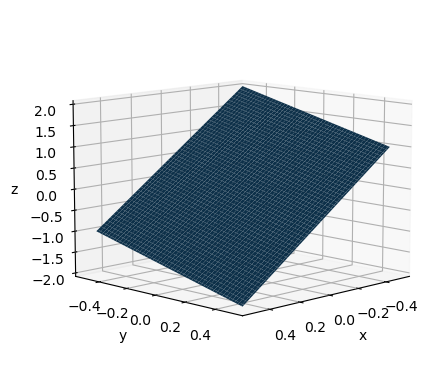

In [4]:
#Plot plane:
Plane = plane_from_normal_vector(e1,e2,np.array([[0,0,0]]))
Plane.print_eq()
plotter(Plane.z)

#### Task 2.2

In [9]:
g = np.array([[-1, -1, 3]])

g_perp = np.dot(g[0],Plane.n[0]) * Plane.n
print("Perpendicular projection: ",g_perp)
print("Norm: ",np.linalg.norm(g_perp[0]))

g_par = g - g_perp
print("Parallel projection: ",g_par)
print("Norm: ",np.linalg.norm(g_par[0]))

Perpendicular projection:  [[-0.27272727 -0.09090909 -0.09090909]]
Norm:  0.3015113445777636
Parallel projection:  [[-0.72727273 -0.90909091  3.09090909]]
Norm:  3.302891295379082


Plot part:

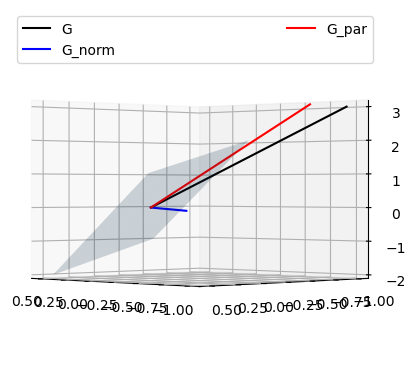

In [6]:
ax = plt.subplot(projection='3d')
ax.view_init(elev=0, azim=135)

#Plane:
x,y = np.meshgrid(def_array.copy(),def_array.copy())
ax.plot_surface(x, y, Plane.z, alpha = 0.2)

#Points G and G_perp:
ax.plot([0, g[0,0]], [0,g[0,1]], [0,g[0,2]], color='k', label = 'G')
ax.plot([0, g_perp[0,0]], [0,g_perp[0,1]], [0,g_perp[0,2]], color='b', label = 'G_norm')
ax.plot([0, g_par[0,0]], [0,g_par[0,1]], [0,g_par[0,2]], color='r', label = 'G_par')

ax.legend(ncol=2, mode="expand")
plt.show()

Proof:

In [7]:
#1)Dot product of g_perp and g_par. Should be 0:
print("Dot product: ",np.dot(g_perp[0],g_par[0]))
#2) g_perp**2 + g_par**2 == g**2:
print("Norm of projection sum: %.1f" % np.sum(g_perp[0]**2 + g_par[0]**2))
print("Norm of g:", np.sum(g[0]**2))

Dot product:  0.0
Norm of projection sum: 11.0
Norm of g: 11


#### Task 2.3

G_perp + G_par:  [[-1. -1.  3.]]
g initial:  [[-1 -1  3]]


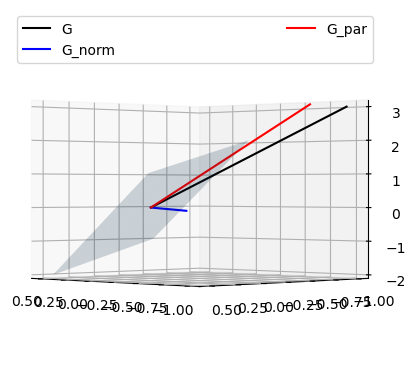

In [8]:
G = g_perp + g_par
print("G_perp + G_par: ", G)
print("g initial: ", g)
#Plot part:3
ax = plt.subplot(projection='3d')
ax.view_init(elev=0, azim=135)

#Plane:
x,y = np.meshgrid(def_array.copy(),def_array.copy())
ax.plot_surface(x, y, Plane.z, alpha = 0.2)

#Points G and G_perp:
ax.plot([0, g[0,0]], [0,g[0,1]], [0,g[0,2]], color='k', label = 'G')
ax.plot([0, g_perp[0,0]], [0,g_perp[0,1]], [0,g_perp[0,2]], color='b', label = 'G_norm')
ax.plot([0, g_par[0,0]], [0,g_par[0,1]], [0,g_par[0,2]], color='r', label = 'G_par')

ax.legend(ncol=2, mode="expand")
plt.show()
